In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



In [165]:
df = pd.read_csv("Housing.csv")

print(" First 5 Rows of Data:")
display(df.head())

print("\n Dataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

df.shape

 First 5 Rows of Data:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Summary Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


(545, 13)

In [166]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [167]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nSkewness of Numeric Features:")
for col in numeric_cols:
    print(f"{col}: {skew(df[col].dropna()):.3f}")


Skewness of Numeric Features:
price: 1.209
area: 1.318
bedrooms: 0.494
bathrooms: 1.585
stories: 1.079
parking: 0.840


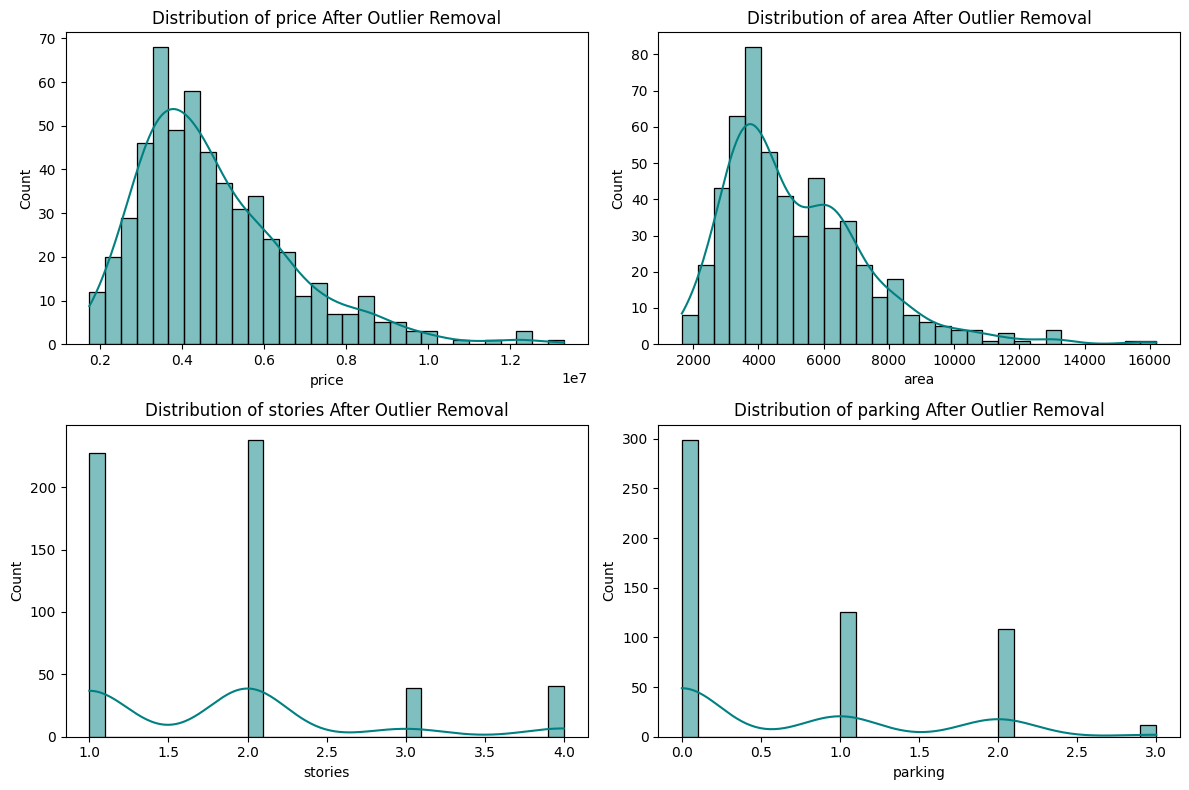

In [168]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(['price', 'area', 'stories', 'parking']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='teal', bins=30)
    plt.title(f"Distribution of {col} After Outlier Removal")

plt.tight_layout()
plt.show()


In [169]:
skewed_cols = ['price', 'area', 'bathrooms', 'stories']  
for col in skewed_cols:
    df[col] = np.log1p(df[col])
    
df['bathrooms'] = df['bathrooms'].astype('category')

print("\nSkewness (After log1p Transformation):")
for col in numeric_cols:
    print(f"{col}: {skew(df[col].dropna()):.3f}")


Skewness (After log1p Transformation):
price: 0.140
area: 0.133
bedrooms: 0.494
bathrooms: 1.307
stories: 0.525
parking: 0.840


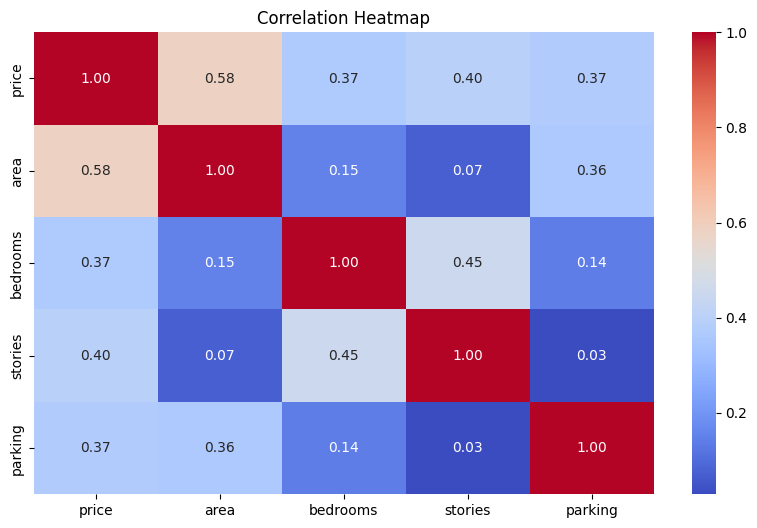

In [170]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [171]:
target_col = 'price' if 'price' in df.columns else 'Price'
X = df.drop(columns=[target_col])
y = df[target_col]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

param_grid = {
    'svr__C': [1, 10, 50, 100, 500, 1000],
    'svr__epsilon': [0.001, 0.01, 0.05, 0.1, 0.2],
    'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid search 
grid_search = GridSearchCV(
    svr_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train_log)

best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)


y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.001, 'svr__gamma': 0.001}
R² Score: 0.656
RMSE: 0.26


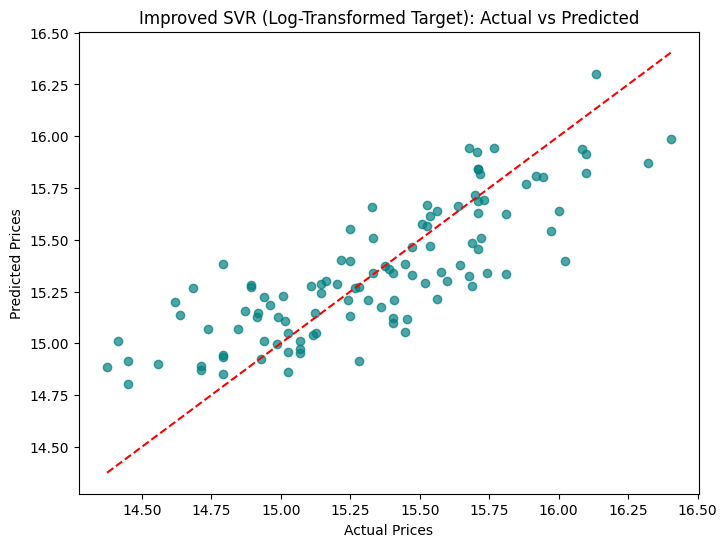

In [173]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="teal", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Improved SVR (Log-Transformed Target): Actual vs Predicted")
plt.show()